In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
data_file = "Resources/dataSet.csv"
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_file_pd = pd.read_csv(city_data_to_load)
ride_file_pd = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride_file_pd,city_file_pd,how='left')
df.head()
#print(city_file_pd.loc[city_file_pd['city'] == 'Amandaburgh'])
# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
df2 = df.loc[df['type'] == 'Urban']
df3 = df.loc[df['type'] == 'Suburban']
df4 = df.loc[df['type'] == 'Rural']

df5 = df2.groupby('city',as_index=False).agg({'fare':["count","mean"],'driver_count':['mean']})
u_x = df5.iloc[:,1]
u_y = df5.iloc[:,2]
u_z = df5.iloc[:,3]

df6 = df3.groupby('city',as_index=False).agg({'fare':["count","mean"],'driver_count':['mean']})
s_x = df6.iloc[:,1]
s_y = df6.iloc[:,2]
s_z = df6.iloc[:,3]

df7 = df4.groupby('city',as_index=False).agg({'fare':["count","mean"],'driver_count':['mean']})
r_x = df7.iloc[:,1]
r_y = df7.iloc[:,2]
r_z = df7.iloc[:,3]

## Bubble Plot of Ride Sharing Data

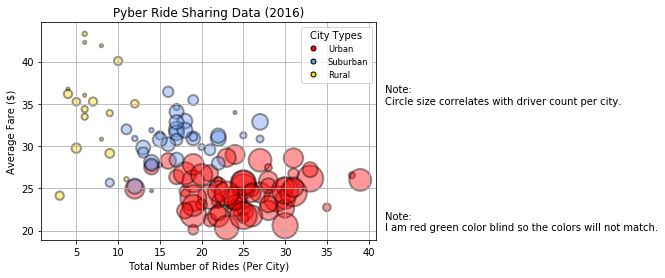

In [3]:
#plt.scatter(u_x, u_y, s=u_z, c="red", alpha=0.4)

import matplotlib.lines as mlines
m = 10
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(u_x, u_y, s=u_z*m, c="red", alpha=0.4, linewidth=2, label='Urban',edgecolor = 'black')
ax1.scatter(s_x,s_y, s=s_z*m, c="cornflowerblue", alpha=0.4, linewidth=2, label='Suburban',edgecolor = 'black')
ax1.scatter(r_x,r_y, s=r_z*m, c="gold", alpha=0.4, linewidth=2, label='Rural',edgecolor = 'black')
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(which='major',axis='both')
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42,35,s="Note:\nCircle size correlates with driver count per city.")
plt.text(42,20,s="Note:\nI am red green color blind so the colors will not match.")
a = mlines.Line2D([], [], color='red', marker='o',markersize=5, label='Urban',linewidth=0,markeredgecolor='black')
b = mlines.Line2D([], [], color='cornflowerblue', marker='o',markersize=5, label='Suburban',linewidth=0,markeredgecolor='black')
c = mlines.Line2D([], [], color='gold', marker='o',markersize=5, label='Rural',linewidth=0,markeredgecolor='black')
plt.legend(handles=[a, b, c], loc = 1, fontsize = 'small', fancybox = True,title = 'City Types')
# save figure
plt.savefig("bubble_ride_sharing.png")
plt.show()


## Total Fares by City Type

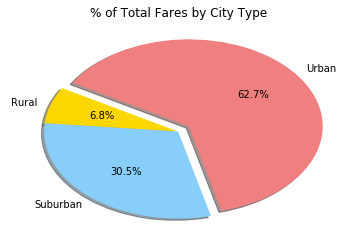

In [4]:
# Calculate Type Percents
df8 = df.groupby('type',as_index=False).agg({'fare':["count","sum"]})
t_fare = df['fare'].sum()
types = []
a_fare = []
types = df8.iloc[:,0]
for x in range(len(df8)):
    a_fare.append(df8.iloc[x,2]/t_fare*100)


# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title('% of Total Fares by City Type')
plt.pie(a_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("total_fares.png")
plt.show()

## Total Rides by City Type

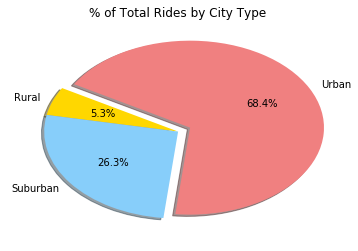

In [5]:
# Calculate Type Percents
df9 = df.groupby('type',as_index=False).agg({'fare':["count","sum"]})
rc_fare = df['fare'].count()
r_types = []
r_fare = []
r_types = df9.iloc[:,0]
for x in range(len(df9)):
    r_fare.append(df9.iloc[x,1]/rc_fare*100)


# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title('% of Total Rides by City Type')
plt.pie(r_fare, explode=explode, labels=r_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("total_rides.png")
plt.show()

## Total Drivers by City Type

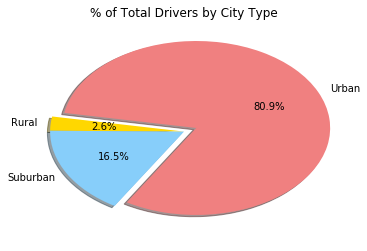

In [6]:
# Calculate Type Percents

df11 = city_file_pd.groupby('type',as_index=False).agg({'driver_count':["count","sum"]})
ds_driver = city_file_pd['driver_count'].sum()
c_types = []
c_driver = []
c_types = df11.iloc[:,0]
for x in range(len(df11)):
    c_driver.append(df11.iloc[x,2]/ds_driver*100)

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title('% of Total Drivers by City Type')
plt.pie(c_driver, explode=explode, labels=c_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure
plt.savefig("total_drivers.png")
plt.show()